# MINI PROJECT: Investigation on The Effectivenness of Vaccination on COVID-19

# Sub Prob 2: Would further/extra booster shots build improved immunity against Covid-19? (by. KIM JUNGYEON)

## Data Cleaning & Analysis of each dataframe

In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from __future__ import division

In [2]:
# Importing External Dataset
booster = pd.read_csv('Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status_and_Second_Booster_Dose.csv')

In [3]:
# Quick look on the imported data
booster.head()

,outcome,month,mmwr_week,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,...,crude_one_two_booster_irr,age_adj_one_booster_ir,age_adj_two_booster_ir,age_adj_vax_ir,age_adj_unvax_ir,age_adj_one_booster_irr,age_adj_two_booster_irr,age_adj_vax_irr,age_adj_one_two_booster_irr,continuity_correction
0,case,MAR 2022,202213,50-64,all_types,9456,16833128,89,175807,4272,...,1.109657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,case,MAR 2022,202213,65+,all_types,8497,19712573,138,325768,2787,...,1.017540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,case,MAR 2022,202213,all_ages,Janssen,807,1996405,6,26780,680,...,1.804198,39.258607,18.529475,27.803018,104.757098,2.668386,5.653538,3.767832,2.118711,1
3,case,MAR 2022,202213,all_ages,Moderna,7407,16427853,100,221352,2684,...,0.998033,47.000084,49.912986,25.806329,104.757098,2.228870,2.098794,4.059357,0.941640,1
4,case,MAR 2022,202213,all_ages,Pfizer,9722,18082006,120,247654,3688,...,1.109617,54.461172,48.418641,30.183994,104.757098,1.923519,2.163570,3.470617,1.124798,1


In [64]:
# Data cleaning on specific columns in need
booster_clean = booster.drop(columns=['month', 'mmwr_week', 'fully_vaccinated_population', 'crude_one_booster_ir', 'crude_two_booster_ir', 'crude_vax_ir', 'crude_unvax_ir', 'crude_irr', 'crude_one_booster_irr', 'crude_two_booster_irr', 'crude_one_two_booster_irr', 'age_adj_one_booster_ir', 'age_adj_two_booster_ir', 'age_adj_vax_ir', 'age_adj_unvax_ir', 'age_adj_one_booster_irr', 'age_adj_two_booster_irr', 'age_adj_vax_irr', 'age_adj_one_two_booster_irr', 'continuity_correction'])

In [5]:
# Quick look on the cleaned data
booster_clean.head()

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
0,case,50-64,all_types,9456,16833128,89,175807,4272,5178
1,case,65+,all_types,8497,19712573,138,325768,2787,3829
2,case,all_ages,Janssen,807,1996405,6,26780,680,9007
3,case,all_ages,Moderna,7407,16427853,100,221352,2684,9007
4,case,all_ages,Pfizer,9722,18082006,120,247654,3688,9007


In [6]:
# Statistical detail on the cleaned data
booster_clean.describe()

,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
count,294.000000,2.940000e+02,294.000000,2.940000e+02,294.000000,294.000000
mean,18347.649660,1.448718e+07,3865.877551,4.203721e+06,7050.346939,16335.901361
std,24327.080258,8.168245e+06,5864.401569,3.573072e+06,9414.586547,18802.691395
min,2.000000,1.540926e+06,0.000000,2.668100e+04,6.000000,22.000000
25%,190.500000,1.196602e+07,10.250000,5.318182e+05,103.500000,364.000000
50%,2312.500000,1.386066e+07,145.000000,3.864000e+06,1813.500000,9007.000000
75%,35463.000000,1.637040e+07,7300.500000,6.371938e+06,12525.250000,28196.500000
max,104544.000000,3.664403e+07,25775.000000,1.427871e+07,42449.000000,59741.000000


### Based on different vaccination types ##

In [7]:
# Pfizer
booster_clean.loc[booster_clean['vaccine_product'] == 'Pfizer']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
4,case,all_ages,Pfizer,9722,18082006,120,247654,3688,9007
10,case,all_ages,Pfizer,13950,18130535,244,271711,4668,11164
16,case,all_ages,Pfizer,18919,18048035,455,459824,6161,14250
22,case,all_ages,Pfizer,22612,17555996,1055,1109428,7759,17268
28,case,all_ages,Pfizer,28571,17030392,1970,1791013,9656,21656
34,case,all_ages,Pfizer,36146,16598613,3320,2355155,12309,27892
40,case,all_ages,Pfizer,43842,16212955,4814,2861798,15273,34681
46,case,all_ages,Pfizer,46628,15872681,5990,3310421,16601,40374
52,case,all_ages,Pfizer,46639,15552828,6890,3734245,17050,40994
58,case,all_ages,Pfizer,44829,15232014,7777,4162133,16854,42000


In [8]:
# Janssen
booster_clean.loc[booster_clean['vaccine_product'] == 'Janssen']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
2,case,all_ages,Janssen,807,1996405,6,26780,680,9007
8,case,all_ages,Janssen,978,2005589,5,28043,812,11164
14,case,all_ages,Janssen,1310,2006555,21,38717,1105,14250
20,case,all_ages,Janssen,1632,1987253,43,71380,1346,17268
26,case,all_ages,Janssen,2033,1966062,71,105661,1679,21656
32,case,all_ages,Janssen,2687,1948211,152,135132,2149,27892
38,case,all_ages,Janssen,3249,1932054,223,162273,2530,34681
44,case,all_ages,Janssen,3512,1916576,303,187960,2848,40374
50,case,all_ages,Janssen,3432,1900939,285,213816,2777,40994
56,case,all_ages,Janssen,3244,1883915,362,241176,2608,42000


In [9]:
# Moderna
booster_clean.loc[booster_clean['vaccine_product'] == 'Moderna']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
3,case,all_ages,Moderna,7407,16427853,100,221352,2684,9007
9,case,all_ages,Moderna,10264,16468469,184,240209,3460,11164
15,case,all_ages,Moderna,14017,16388519,351,417989,4639,14250
21,case,all_ages,Moderna,16975,15940165,815,1019579,5528,17268
27,case,all_ages,Moderna,21322,15459956,1529,1646973,6797,21656
33,case,all_ages,Moderna,27309,15063453,2431,2165919,8828,27892
39,case,all_ages,Moderna,33394,14705411,3604,2636430,10964,34681
45,case,all_ages,Moderna,35761,14381725,4685,3059539,12373,40374
51,case,all_ages,Moderna,35477,14080758,5364,3456822,12600,40994
57,case,all_ages,Moderna,35213,13779336,6078,3857508,12534,42000


In [10]:
# All types
booster_clean.loc[booster_clean['vaccine_product'] == 'all_types']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
0,case,50-64,all_types,9456,16833128,89,175807,4272,5178
1,case,65+,all_types,8497,19712573,138,325768,2787,3829
5,case,all_ages,all_types,17953,36545701,227,501575,7059,9007
6,case,50-64,all_types,13092,16905600,149,187504,5591,6545
7,case,65+,all_types,12120,19738429,284,358355,3356,4619
...,...,...,...,...,...,...,...,...,...
283,death,65+,all_types,298,11592472,84,8252745,156,319
287,death,all_ages,all_types,321,23979019,89,12504508,184,364
288,death,50-64,all_types,18,12342873,1,4329807,23,58
289,death,65+,all_types,300,11525730,87,8351910,160,264


### Based on Different Age Groups

In [11]:
# 50-64
booster_clean.loc[booster_clean['age_group'] == '50-64']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
0,case,50-64,all_types,9456,16833128,89,175807,4272,5178
6,case,50-64,all_types,13092,16905600,149,187504,5591,6545
12,case,50-64,all_types,17794,16900157,304,294338,7398,8279
18,case,50-64,all_types,20489,16697099,632,617717,8811,9949
24,case,50-64,all_types,26452,16471058,1212,960685,11137,12421
30,case,50-64,all_types,34540,16271090,2103,1262452,14720,16344
36,case,50-64,all_types,42133,16077673,3086,1552817,18131,20466
42,case,50-64,all_types,45199,15888780,3940,1831310,19930,23987
48,case,50-64,all_types,44979,15699110,4551,2109966,20228,24424
54,case,50-64,all_types,42944,15496105,5166,2407592,19632,24607


In [12]:
# 65+
booster_clean.loc[booster_clean['age_group'] == '65+']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
1,case,65+,all_types,8497,19712573,138,325768,2787,3829
7,case,65+,all_types,12120,19738429,284,358355,3356,4619
13,case,65+,all_types,16496,19582254,525,628343,4520,5971
19,case,65+,all_types,20768,18824433,1282,1590239,5846,7319
25,case,65+,all_types,25520,18022054,2361,2592190,7015,9235
31,case,65+,all_types,31695,17374815,3811,3404253,8595,11548
37,case,65+,all_types,38439,16807449,5564,4119252,10679,14215
43,case,65+,all_types,40808,16316063,7050,4739172,11928,16387
49,case,65+,all_types,40666,15868521,7997,5308378,12238,16570
55,case,65+,all_types,40419,15431569,9065,5867542,12408,17393


In [13]:
# All ages
booster_clean.loc[booster_clean['age_group'] == 'all_ages']

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome
2,case,all_ages,Janssen,807,1996405,6,26780,680,9007
3,case,all_ages,Moderna,7407,16427853,100,221352,2684,9007
4,case,all_ages,Pfizer,9722,18082006,120,247654,3688,9007
5,case,all_ages,all_types,17953,36545701,227,501575,7059,9007
8,case,all_ages,Janssen,978,2005589,5,28043,812,11164
...,...,...,...,...,...,...,...,...,...
287,death,all_ages,all_types,321,23979019,89,12504508,184,364
290,death,all_ages,Janssen,12,1540926,2,416990,18,322
291,death,all_ages,Moderna,164,10589117,43,5883855,70,322
292,death,all_ages,Pfizer,142,11711013,43,6360711,92,322


### The cleaned data contains all vaccine types and age groups, which are redundant or repetitive in terms of getting the total value of positive cases. Therefore another cleaning must be done so that no data is being repeated and at the same time, onyl the total values are extracted.

In [65]:
# All Ages and Vaccination Types
booster_total = booster_clean[(booster_clean['age_group'] == 'all_ages') & (booster_clean['vaccine_product'] == 'all_types')]

In [66]:
# Look on the further cleaned data
booster_total

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome,unvaccinated_population
5,case,all_ages,all_types,17953,36545701,227,501575,7059,9007,9184115.90
11,case,all_ages,all_types,25212,36644029,433,545859,8947,11164,9136941.90
17,case,all_ages,all_types,34290,36482411,829,922681,11918,14250,9087180.90
23,case,all_ages,all_types,41257,35521532,1914,2207956,14657,17268,9041597.90
29,case,all_ages,all_types,51972,34493112,3573,3552875,18152,21656,8999296.05
35,case,all_ages,all_types,66235,33645905,5914,4666705,23315,27892,8961317.35
41,case,all_ages,all_types,80572,32885122,8650,5672069,28810,34681,8924145.35
47,case,all_ages,all_types,86007,32204843,10990,6570482,31858,40374,8885746.35
53,case,all_ages,all_types,85645,31567631,12548,7418344,32466,40994,8848208.35
59,case,all_ages,all_types,83363,30927674,14231,8275134,32040,42000,8819821.35


In [67]:
# All Ages and Vaccination Types with postive cases
booster_total_case = booster_clean[(booster_clean['outcome'] == 'case') & (booster_clean['age_group'] == 'all_ages') & (booster_clean['vaccine_product'] == 'all_types')]

In [68]:
# Look on the further cleaned data (with positive cases rather than deaths)
booster_total_case

,outcome,age_group,vaccine_product,one_boosted_with_outcome,one_booster_population,two_boosted_with_outcome,two_booster_population,vaccinated_with_outcome,unvaccinated_with_outcome,unvaccinated_population
5,case,all_ages,all_types,17953,36545701,227,501575,7059,9007,9184115.90
11,case,all_ages,all_types,25212,36644029,433,545859,8947,11164,9136941.90
17,case,all_ages,all_types,34290,36482411,829,922681,11918,14250,9087180.90
23,case,all_ages,all_types,41257,35521532,1914,2207956,14657,17268,9041597.90
29,case,all_ages,all_types,51972,34493112,3573,3552875,18152,21656,8999296.05
35,case,all_ages,all_types,66235,33645905,5914,4666705,23315,27892,8961317.35
41,case,all_ages,all_types,80572,32885122,8650,5672069,28810,34681,8924145.35
47,case,all_ages,all_types,86007,32204843,10990,6570482,31858,40374,8885746.35
53,case,all_ages,all_types,85645,31567631,12548,7418344,32466,40994,8848208.35
59,case,all_ages,all_types,83363,30927674,14231,8275134,32040,42000,8819821.35


In [18]:
# Finding number of rows to get how many numbers are collected for each variable for later use
booster_total_case.shape

(26, 9)

-------------

## AI model to predict effectiveness of Booster Dose (1st & 2nd separately)

## This AI model predicts the number of people with positive cases when it gets an input data of population based on their boost shot dose status. In other words, the AI model will be able to predict how many people will ge positive cases if the model knows how many people got first, second, or further booster shots.

In [19]:
# Function for statistical vizualization

def Stat_Viz(dataframe, var_list):
    f, axes = plt.subplots(len(var_list), 3, figsize = (16, 16))
    count_int = 0
    colors = ["r", "g", "b", "m", "c"]
    for var in var_list:
        sb.boxplot(x = dataframe[var], orient= "h", color = colors[count_int], ax = axes[count_int,0])
        sb.histplot(x = dataframe[var], kde = False, color = colors[count_int], ax = axes[count_int,1])
        sb.violinplot(x = dataframe[var], orient= "h", color = colors[count_int], ax = axes[count_int,2])
        count_int += 1

In [20]:
# Function for Linear Regression Model

def LinReg(data, predictor, response, test_ratio, model = LinearRegression()):
    print("Predictor:\t", predictor)
    print("Response:\t",  response)
    sb.jointplot(x = data[predictor], y = data[response], color = 'b', kind = "reg", height = 6)
    X = pd.DataFrame(data[predictor])
    y = pd.DataFrame(data[response])
    linreg = model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)
    
    linreg.fit(X_train, y_train)
    print('Gradient:\t m = ', linreg.coef_)
    print('Intercept:\t c = ', linreg.intercept_)
        
    regline_x = X_train
    regline_y = (linreg.coef_ * X_train) + linreg.intercept_ 

    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    print("Explained Variance for Training (R^2)\t:", linreg.score(X_train, y_train))
    print("Explained Variance for Testing (R^2)\t:", linreg.score(X_test, y_test))
    print("Mean Squared Error for Training Set \t:", mean_squared_error(y_train, y_train_pred))
    print("Mean Squared Error for Testing Set \t:", mean_squared_error(y_test, y_test_pred))


    f, axes = plt.subplots(1, 2, figsize=(10, 8))
    axes[0].scatter(x = X_train, y = y_train, s = 10, c = 'b')

    axes[0].plot(regline_x, regline_y, 'k-', linewidth = 2)
    axes[1].scatter(x = X_test, y = y_test, s = 10, c = "g")
    axes[1].scatter(x = X_test, y = y_test_pred, s = 10, c = "k")
    plt.show()

In [21]:
# Function for Random Forest Regression Model

def ForReg(data, predictor, response, test_ratio, model = RandomForestRegressor()):
    print("Predictor:\t", predictor)
    print("Response:\t",  response)
    X = pd.DataFrame(data[predictor])
    y = pd.DataFrame(data[response])
    reg = model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio)
        
    regressor = RandomForestRegressor(n_estimators=20, random_state=42)
    regressor.fit(X_train, y_train.values.ravel())
    y_pred = regressor.predict(X_test)
    
    from sklearn import metrics

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [22]:
## source 1: https://towardsdatascience.com/how-to-train-a-regression-model-using-a-random-forest-c1cf16288f6b

In [23]:
## source 2: https://towardsdatascience.com/random-forest-regression-5f605132d19d

In [24]:
## source 3: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

In [25]:
## source 4: https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

### First Booster Shot

In [26]:
# Extracting number of positive cases among people with 1st booster shots
booster_first = pd.DataFrame(booster_total_case['one_boosted_with_outcome'])

In [27]:
booster_first.head()

,one_boosted_with_outcome
5,17953
11,25212
17,34290
23,41257
29,51972


In [28]:
booster_first.describe()

,one_boosted_with_outcome
count,26.000000
mean,68827.461538
std,24731.334567
min,17953.000000
25%,48140.250000
50%,76802.500000
75%,85916.500000
max,104544.000000


In [29]:
# Total population of people with 1st booster shot

booster_first_pop = pd.DataFrame(booster_total_case['one_booster_population'])

In [30]:
booster_first_pop.describe()

,one_booster_population
count,2.600000e+01
mean,3.042241e+07
std,3.352297e+06
min,2.680044e+07
25%,2.754382e+07
50%,2.930370e+07
75%,3.271505e+07
max,3.664403e+07


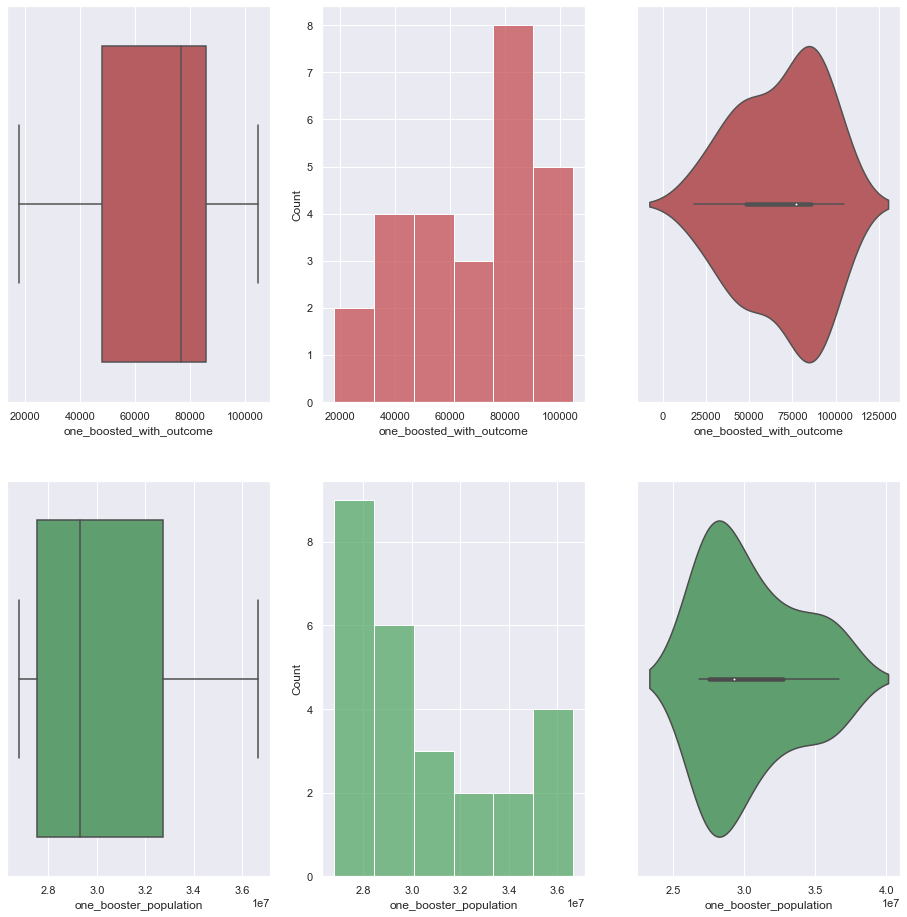

In [31]:
# Statistical vizualization for 1st Booster & 1st boosted population

Stat_Viz(booster_total_case, ["one_boosted_with_outcome", "one_booster_population"])

,one_booster_population,one_boosted_with_outcome
one_booster_population,1.00000,-0.44245
one_boosted_with_outcome,-0.44245,1.00000


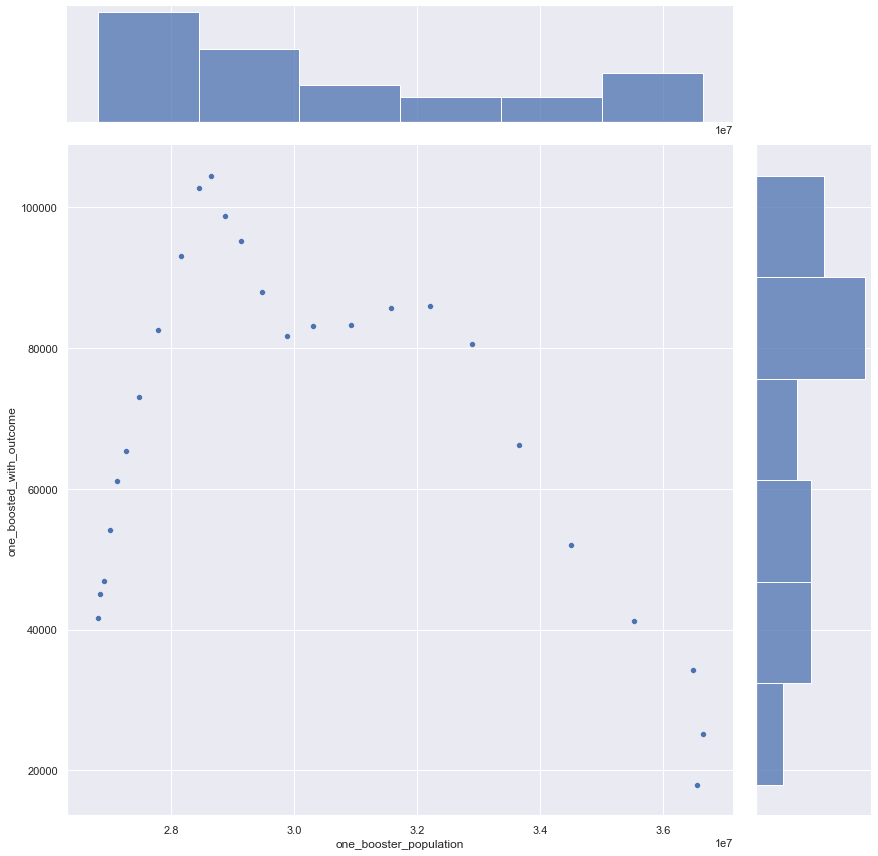

In [32]:
# Joint plot for direct comparison between two variables

jointDF = pd.concat([booster_first_pop, booster_first], axis = 1).reindex(booster_first_pop.index)
sb.jointplot(data = jointDF, x = "one_booster_population", y = "one_boosted_with_outcome", height = 12)
jointDF.corr()

Predictor:	 one_booster_population
Response:	 one_boosted_with_outcome
Gradient:	 m =  [[-0.00429302]]
Intercept:	 c =  [204363.04613592]
Explained Variance for Training (R^2)	: 0.295960740604827
Explained Variance for Testing (R^2)	: -0.31747299163068443
Mean Squared Error for Training Set 	: 424858433.6622826
Mean Squared Error for Testing Set 	: 697485345.9360535


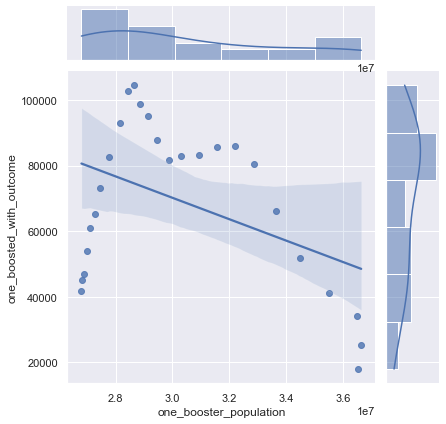

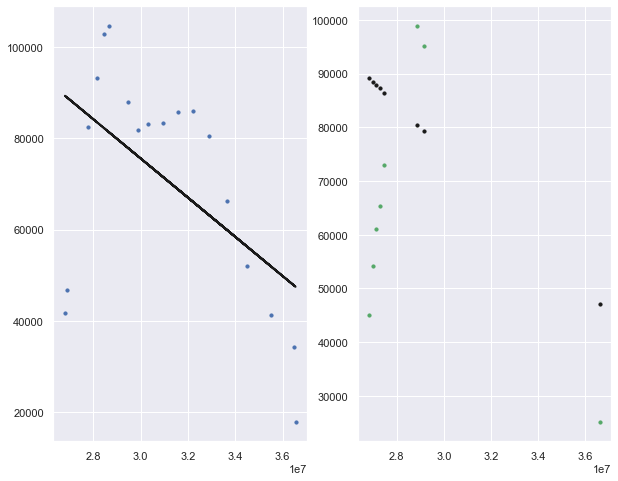

In [31]:
# AI based on Linear Regression model and it's error for the first booster shot

LinReg(booster_total_case, "one_booster_population", "one_boosted_with_outcome", 0.3, model = LinearRegression())

### This is valid only if the variables have linear relationship. However, the graph shown above doesn't resemble any linear relationship, and this is further supported by the huge mean squared error together with a negative explaied variance value. Therefore, we must use another method that can find a relationship betwee unknnown variables with unknown relationship, whcih is beyond the scope of this course. Here, I have implmented Random Forest Regression model, which can better find the relationship between two variables with non-linear relationship.

In [32]:
# AI based on Random Forest Regression model and it's error for the first booster shot

ForReg(booster_total_case, "one_booster_population", "one_boosted_with_outcome", 0.3, model = RandomForestRegressor())

Predictor:	 one_booster_population
Response:	 one_boosted_with_outcome
Mean Absolute Error: 3753.7124999999996
Mean Squared Error: 44134624.71062499
Root Mean Squared Error: 6643.389549817547


### Linear Regression Model
    Explained Variance for Training (R^2): 0.295960740604827
    Explained Variance for Testing (R^2): -0.31747299163068443
    Mean Squared Error for Training Set: 424858433.6622826
    Mean Squared Error for Testing Set: 697485345.9360535

### Random Forest Regression Model
    Mean Squared Error: 44134624.71062499
    Root Mean Squared Error: 6643.389549817547
    
### The mean squared error is much larger for linear regression model as the graph shows non-linear relationship between the two variables. Therefore, Random Forest Regression model was used to make a better AI model to predict the number of people with positive cases even with the first booster dose. After implmentation of random forest regression model, the mean squared error value became much lower, nearly reduced by factor of 16. This suggests that AI model developed by Random Fores Regression Model gives more accruate prediction compared to the prediction based on Linear Regression model for predicting variable with non-linear relationship.

### Second Booster Shot

In [60]:
# Extracting number of positive cases among people with 2nd booster shots

booster_second = pd.DataFrame(booster_total_case['two_boosted_with_outcome'])

In [34]:
booster_second.head()

,two_boosted_with_outcome
5,227
11,433
17,829
23,1914
29,3573


In [35]:
booster_second.describe()

,two_boosted_with_outcome
count,26.000000
mean,14517.461538
std,8192.774589
min,227.000000
25%,9235.000000
50%,15557.500000
75%,20524.250000
max,25775.000000


In [36]:
# Total population of people with 2nd booster shot

booster_second_pop = pd.DataFrame(booster_total_case['two_booster_population'])

In [37]:
booster_second_pop.describe()

,two_booster_population
count,2.600000e+01
mean,9.090850e+06
std,4.633589e+06
min,5.015750e+05
25%,5.896672e+06
50%,1.048324e+07
75%,1.310401e+07
max,1.427871e+07


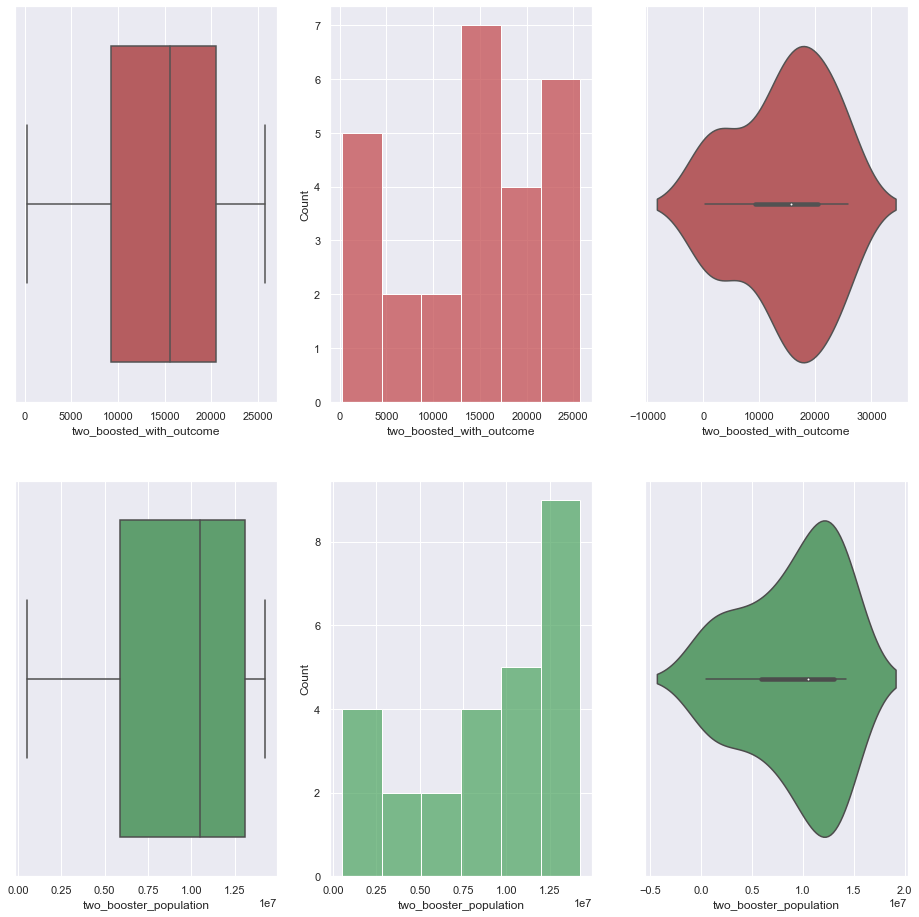

In [38]:
# Statistical vizualization for 2nd Booster & 2nd boosted population

Stat_Viz(booster_total_case, ["two_boosted_with_outcome", "two_booster_population"])

,two_booster_population,two_boosted_with_outcome
two_booster_population,1.000000,0.861718
two_boosted_with_outcome,0.861718,1.000000


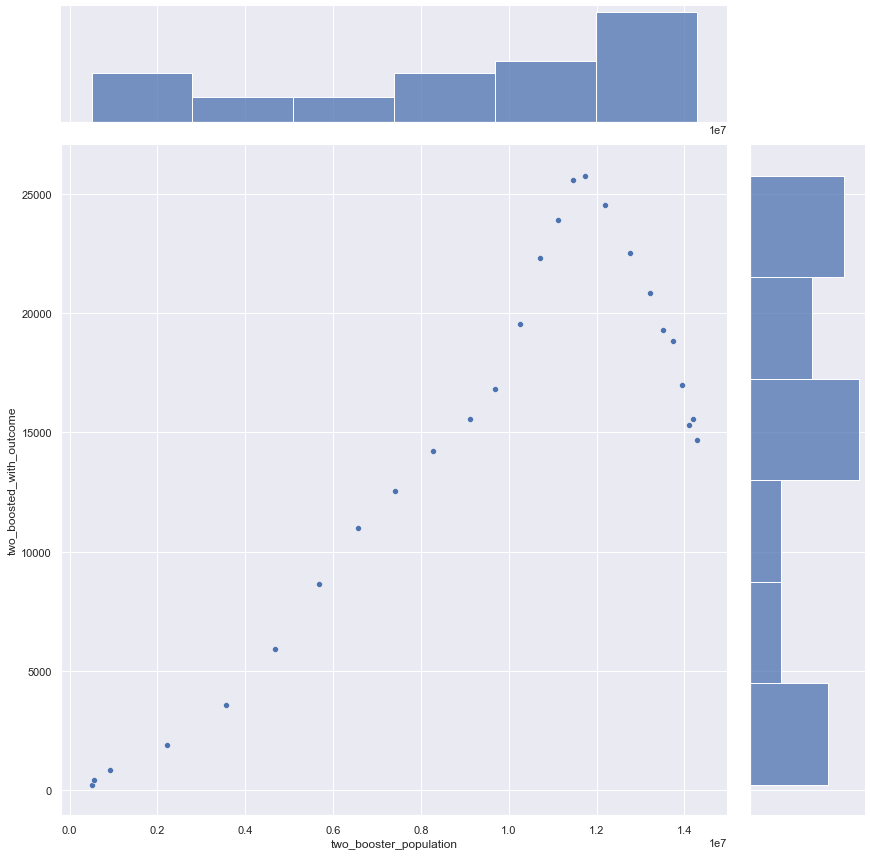

In [39]:
# Joint plot for direct comparison between two variables

jointDF = pd.concat([booster_second_pop, booster_second], axis = 1).reindex(booster_second_pop.index)
sb.jointplot(data = jointDF, x = "two_booster_population", y = "two_boosted_with_outcome", height = 12)
jointDF.corr()

Predictor:	 two_booster_population
Response:	 two_boosted_with_outcome
Gradient:	 m =  [[0.00140373]]
Intercept:	 c =  [1549.87198509]
Explained Variance for Training (R^2)	: 0.6700015045293852
Explained Variance for Testing (R^2)	: 0.8372740996031282
Mean Squared Error for Training Set 	: 18387788.629250817
Mean Squared Error for Testing Set 	: 13730018.713040194


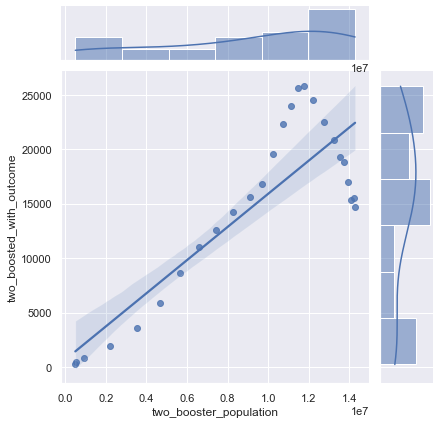

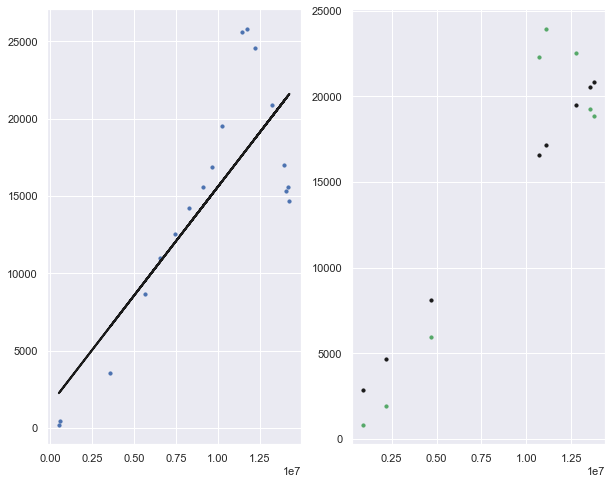

In [38]:
# AI based on Linear Regression model and it's error for the second booster shot

LinReg(booster_total_case, "two_booster_population", "two_boosted_with_outcome", 0.3, model = LinearRegression())

### This is valid only if the variables have linear relationship. Therefore, we must use another method that can find a relationship betwee unknnown variables with unknown relationnship. Therefore I'm using RandomRegressor here.

In [39]:
# AI based on Random Forest Regression model and it's error for the second booster shot

ForReg(booster_total, "two_booster_population", "two_boosted_with_outcome", 0.3, model = RandomForestRegressor())

Predictor:	 two_booster_population
Response:	 two_boosted_with_outcome
Mean Absolute Error: 9920.566666666668
Mean Squared Error: 151995891.69333333
Root Mean Squared Error: 12328.661390975636


### Linear Regression Model
    Explained Variance for Training (R^2): 0.6700015045293852
    Explained Variance for Testing (R^2): 0.8372740996031282
    Mean Squared Error for Training Set: 18387788.629250817
    Mean Squared Error for Testing Set: 13730018.713040194

### Random Forest Regression Model
    Mean Squared Error: 151995891.69333333
    Root Mean Squared Error: 12328.661390975636
    
### For the second booster dose, the AI model based on Linear Regression model made prediction with lower mean squared error compared to the model based on Random Forest Regression. This was possible because of 2 reasons. First, the relationship between 2 variables show somewhat like a linear relationship hence, the linear regression model also generates a similar or even a better prediction that the random forest regression model. Second, there is not sufficient amount of data from the dataset that can be used for prediction as the total number of rows is only 26, meaning there are only 26 pairs of data for the two variables for comparison, which can result in a biased prediction.

--------------------------------------

## PREDICT THE EFFECTIVENESS OF FURTHER BOOSTER SHOTS BASED ON 1ST & 2ND BOOSTER SHOTS

### To see how effective each booster is, we need to knnow what percentage off vaccinated population (with booster shots) still got postive cases and compare the statistics to that of unvaccinated (without booster shots) people. By doing so, we will be able to see whether the booster shot was effective in terms of reducing the rate of positive cases.

### 1st Booster

In [40]:
booster_first.describe()

,one_boosted_with_outcome
count,26.000000
mean,68827.461538
std,24731.334567
min,17953.000000
25%,48140.250000
50%,76802.500000
75%,85916.500000
max,104544.000000


In [41]:
booster_first_pop.describe()

,one_booster_population
count,2.600000e+01
mean,3.042241e+07
std,3.352297e+06
min,2.680044e+07
25%,2.754382e+07
50%,2.930370e+07
75%,3.271505e+07
max,3.664403e+07


In [80]:
print(booster_first.mean())
print(booster_first_pop.mean())
print("Mean based percentage = 0.22623934638 %") #positive cases divided by total first dosed population (Mean)

one_boosted_with_outcome    68827.461538
dtype: float64
one_booster_population    3.042241e+07
dtype: float64
Mean based percentage = 0.22623934638 %


In [81]:
print(booster_first.median())
print(booster_first_pop.median())
print("Median based percentage = 0.26209144072 %") #positive cases divided by total first dosed population (Median)

one_boosted_with_outcome    76802.5
dtype: float64
one_booster_population    29303704.0
dtype: float64
Median based percentage = 0.26209144072 %


### 2nd Booster

In [43]:
booster_second.describe()

,two_boosted_with_outcome
count,26.000000
mean,14517.461538
std,8192.774589
min,227.000000
25%,9235.000000
50%,15557.500000
75%,20524.250000
max,25775.000000


In [44]:
booster_second_pop.describe()

,two_booster_population
count,2.600000e+01
mean,9.090850e+06
std,4.633589e+06
min,5.015750e+05
25%,5.896672e+06
50%,1.048324e+07
75%,1.310401e+07
max,1.427871e+07


In [82]:
print(booster_second.mean())
print(booster_second_pop.mean())
print("Mean based percentage = 0.15969311492 %") #positive cases divided by total second dosed population (Mean)

two_boosted_with_outcome    14517.461538
dtype: float64
two_booster_population    9.090850e+06
dtype: float64
Mean based percentage = 0.15969311492 %


In [83]:
print(booster_second.median())
print(booster_second_pop.median())
print("Median based percentage = 0.14840353283 %") #positive cases divided by total second dosed population (Median)

two_boosted_with_outcome    15557.5
dtype: float64
two_booster_population    10483241.0
dtype: float64
Median based percentage = 0.14840353283 %


### No Booster

In [62]:
no_booster = pd.DataFrame(booster_total_case['unvaccinated_with_outcome'])

In [70]:
no_booster.describe()

,unvaccinated_with_outcome
count,26.000000
mean,36596.038462
std,14866.287616
min,9007.000000
25%,24763.500000
50%,40450.500000
75%,45655.500000
max,59741.000000


In [69]:
no_booster_pop = pd.DataFrame(booster_total_case['unvaccinated_population'])

In [71]:
no_booster_pop.describe()

,unvaccinated_population
count,2.600000e+01
mean,8.753946e+06
std,2.185217e+05
min,8.473097e+06
25%,8.559007e+06
50%,8.721767e+06
75%,8.914546e+06
max,9.184116e+06


In [84]:
print(no_booster.mean())
print(no_booster_pop.mean())
print("Mean based percentage = 0.41805191009 %") #positive cases divided by total unvacinnated population (Mean)

unvaccinated_with_outcome    36596.038462
dtype: float64
unvaccinated_population    8.753946e+06
dtype: float64
Mean based percentage = 0.41805191009 %


In [85]:
print(no_booster.median())
print(no_booster_pop.median())
print("Median based percentage = 0.46378788124 %") #positive cases divided by total unvacinnated population (Median)

unvaccinated_with_outcome    40450.5
dtype: float64
unvaccinated_population    8721767.35
dtype: float64
Median based percentage = 0.46378788124 %


### The above calculations show that based on the number of positive cases compared to the population with respect booster dose (includinng unvaccinated), second booster shot has the lowest breakthrough rate while unvaccinated population had the highest breakthrough rate. Therefore, our data shows that booster shots are effective and as number of booster doses increases from one to multiple, the breaktrough rate will further decrease. In conclusion, further booster dose will positively affect the population in terms of preventing breakthrough infections. However, effect of booster dose heavily depends on the age group and vaccine type, which are not considered in this case. Hence, more detailed approach considering more variables must be taken to come up with a more reasonable solution.